In [ ]:
# NOTE FOR THE REVIEWER

Enron Submission Free-Response Questions

A critical part of machine learning is making sense of your analysis process and communicating it to others. The questions below will help us understand your decision-making process and allow us to give feedback on your project. Please answer each question; your answers should be about 1-2 paragraphs per question. If you find yourself writing much more than that, take a step back and see if you can simplify your response!

When your evaluator looks at your responses, he or she will use a specific list of rubric items to assess your answers. Here is the link to that rubric: Link to the rubric Each question has one or more specific rubric items associated with it, so before you submit an answer, take a look at that part of the rubric. If your response does not meet expectations for all rubric points, you will be asked to revise and resubmit your project. Make sure that your responses are detailed enough that the evaluator will be able to understand the steps you took and your thought processes as you went through the data analysis.

Once you’ve submitted your responses, your coach will take a look and may ask a few more focused follow-up questions on one or more of your answers.  

We can’t wait to see what you’ve put together for this project!

### Question 1

Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

**Answer:** The goal of this project is to take the enron email and financial data, including the 'Person of Interest' or 'POI' classification, and attempt to train a classifier to find people in the dataset who should be classified as a 'POI'. This problem is well suited to be solved using supervised machine learning. Not only do we have structured and labeled data to help us solve this problem, but it is also a classification problem. Both of these traits point to the use of supervised learning where we can take a corpus of training data and train a classifier to help us classify people of interest within the data.

The dataset consists of 145 records each with 20 features (including 'POI'). Out of 145 ercords, 18 are classified as POI and 127 are not. Out of the 20 features, there are 7 that are 0 for at least half of the ercords. (deferral_payments, restricted_stock_deferred, loan_advances, from_this_person_to_poi, director_fees, deferred_income, long_term_incentive).

I found 5 outliers in the data ('FREVERT MARK A', 'LAVORATO JOHN J', 'LAY KENNETH L', 'BELDEN TIMOTHY N', 'SKILLING JEFFREY K'). My process for finding them was to analise the people who fell oustide of the interquartile range for each of my selected features. If an individual was an outlier for more than a quarter of the selected features, I considered them as an overall outlier and excluded them from the data. Selecting a threshold of a quarter of the features was a bit arbitrary, but after some trial and error, it felt like a good compromise. It isn't surprising that Jeff Skilling and Ken Lay were considered outliers as the two people who ran enron, their data was far from typical for the dataset.

### Question 2

What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]

**Answer:** I selected 12 of the original features `'exercised_stock_options', 'total_stock_value', 'deferred_income', 'salary', 'bonus', 'from_poi_to_this_person', 'expenses', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'director_fees', 'deferral_payments'`. My method of selection was to pass all of the features and data through `SelectKBest(f_classif, k='all').fit(features, labels)`, mapped the scores back to the feature labels and selected all of the features that ha d a score greater than 1. In addition to these features, I created 5 new ones. All 5 new features, `'to_poi_to_the_from_poi_power', 'from_poi_to_the_to_poi_power', 'expenses_to_the_bonus_power', 'lti_times_expenses_to_the_bonus_power', 'salary_times_expenses_to_the_bonus_power'` were either one feature to the power of another feature or one feature multiplied by another feature to the power of a third feature. My reasoning for engineering new features in this manner is that not only should these new features be linearly indepent of the original features, but they should also amplify the differences between POI and NON-POI records. These features as well as many other attempts were created by trial and error. I only kept the features that received a score from `SelectKBest` greater than 7. The highest score was `21.37` for `lti_times_expenses_to_the_bonus_power`. The following is a sorted list from greatest to smallest of the selected and engineered feature scores (rounded to 2 decimal places) as given by `SelectKBest(f_classif, k='all').fit(features, labels)`.

- **lti_times_expenses_to_the_bonus_power**: 21.37
- **exercised_stock_options**: 14.58
- **total_stock_value**: 13.36
- **expenses_to_the_bonus_power**: 11.69
- **deferred_income**: 11.18
- **to_poi_to_the_from_poi_power**: 10.76
- **salary**: 9.00
- **salary_times_expenses_to_the_bonus_power**: 8.65
- **from_poi_to_the_to_poi_power**: 7.47
- **bonus**: 6.62
- **expenses**: 4.03
- **from_poi_to_this_person**: 3.99
- **from_this_person_to_poi**: 3.94
- **long_term_incentive**: 2.62
- **shared_receipt_with_poi**: 1.80
- **director_fees**: 1.70
- **deferral_payments**: 1.13

Once the new features were created and added to the dataset, there were all scaled and normalised. The data for each feature was first scaled to a range from 0 to 1 inclusive and then normalised using the SoftMax expression to ensure all the features have the same mean value. This process helps ensure that gradients and distances between records can be calculated more consistently while training and evaluating the machine learning algorithm.

### Question 3

What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

**Answer:** I ended up training and evaluate a Random Forest Classifier. I initially tried KKN, AdaBoost, Decision Tree, and Gaussian Process classifiers as well. From the first exploration, I settled on exploring the Random Forest and Gaussian Process classifiers to a greater depth. From the initial exploration, they performed the best with the smallest compromise between classification power and training time. I also felt they would be well suited to utilising the non-linear engineered features. Using all of these classifiers with their default settings resulted in varying degrees of performance in terms of precision, but they all had quite poor recall.

I put both Random Forest and Gaussian Process classifiers through moor rigourous testing using `GridSearchCV` with `StratifiedShuffleSplit` cross validation with 100 folds.

The Gaussian Process classifier managed to achieve a precision of `0.35833` but only a recall of `0.02150`. Even though I could get the precion above 0.3 when running `tester.py` I couldn't gte the recall anywhere close 0.3. This was acchieved setting `warm_start = true` and using the RBF kernel set to `1.0 * RBF(1.0)`.

I managed to achieve better recall performance from the Random Forest classifier though it was at the scarifice of some precission. Multiple iterations through `GridSearchCV` resulted in parameters set to `{'max_features': 4, 'n_estimators': 1, 'max_depth': 40}`. This classifier received the following scores from `tester.py`: `Accuracy: 0.84143	Precision: 0.25414	Recall: 0.25999	F1: 0.25703	F2: 0.25879`. Other algorithms and paramaters svored better for accuracy and precision, but this was the highest recall score I managed to achieve.

### Question 4

What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that 
was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric item: “tune the algorithm”]

**Answer:** Machine Learning algorithms tend to be highly parameterised. The se paramters all the the practioner to tailor the algorithm for a given problem and data set. Failing to properly tume the paramters of an algorithm  will most likely result in the algorithm underfitting or overfitting the training data and in turn gereneralise poorly when confronted with new data. One startegy to perform hyperparameter optimisation using grid search. This process takes a set of paramters each with a set of values and iteratively trains and evalutes each version of the algorithm. The grid search process will result in one set of parameters that performed the best out of all poossible combinations of the given parameters and values.

As discussed in my answer to Question 3, I used the SKLearn `GridSearchCV` method ofr hyperparameter optimisation. For the Random Forest Classifier, I ended up using grid search twice to optimise the classifier parameters. The first iteration used quite broad values for `max_depth`, `n_estimators`, and `max_features`. I then took the selected paramters for the first search and narrowed the values to try and hone in on the best comination of values. The end result left me with the following parameters for the Random Forest Classifier: `{'max_features': 4, 'n_estimators': 1, 'max_depth': 40}`.

### Question 5

What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric item: “validation strategy”]

**Answer:** Validation when training a machine learning algorithm refers to the act of splitting a fraction of the training data set to use as a validation data set. The validation set acts like the test data set and allows you to evaluate the performs of the algorithm while training it without using the test data set.  A common and potentially distasterous mistake is to use the test data set for validation. If you do this and allow the test data set to influence the training process, the algorithm will 'learn' about the test data through the choices you make while training the algorithm and will most likely overfit that test data leading it to generalise badly when confronted with new data.

The `CV` in `GridSearchCV` stands for 'Cross Validation'. Cross validation is an approach to validation in machine learning where the training data is split into a certain number of 'folds'. For each fold, a fraction of the data equal to the training data count divided by the number of folds (1/10th for the case of 10 folds). For each fold, the data is trained on the non-validation portion of the data and then evaluated on the validtion portion. This process is repeated for each fold allowing the algorithm to learn from subsequent iterations. This process helps the algorithm avoid  overfitting on the training data.

I used the `StratifiedShuffleSplit` module in SKLearn to handle cross validation when I performed grid search. This stratified shuffle split has the benefit of avoiding random bias within the dataset when the proportion of classes is unbalanced. For `StratifiedShuffleSplit`, "folds are made by preserving the percentage of samples for each class" (as stated in the SKLearn documentation).

### Question 6

Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

**Answer:** In the end, I used 3 metrics for evaluating the trained algorithms: accuracy, F1 Score, and Mathew's Correlation Coefficient. 

Accuracy is a useful score to understand the general performance of an algorithm though it can be misleading if the target classes are unequally distributed in a dataset. For example, 12.4% POI records and 87.6% NON-POI records. If an algorithm was very naive and marked all records a NON-POI, it would have an accuracy score of 0.876 which looks like a good outcome, but in this situation it really isn't.

The F1 Score is a weighted proportion of precision and recall. More specifically, it is `2 * precision * recall / (precision + recall)`. Precision and recall can have values from 0 to 1 which means the F1 score does as well. This is a much more useful score when determining the performance of an algorithm trying to classify data with unbalanced classes.

Mathew's Correlation Coefficient measures the quality of binary classifications. It takeas a value between -1 and 1 where 1 indicates perfect prediction, 0 represents no better than random prediction, and -1 indicates predicting every classification incorrectly.

The Random Forest Classifier returned by the first grid search (with parameters set to `{'max_features': 3, 'n_estimators': 3, 'max_depth': 42}`) had received the following evaluation scores when predicting the test data:

- **accuracy_score**: 0.97619047619
- **f1_score**: 0.909090909091
- **matthews_corrcoef**: 0.900450337781

This was far better than I expected. That classifier received the following results from `tester.py`.

- **Accuracy**: 0.86993	
- **Precision**: 0.32046	
- **Recall**: 0.20785	
- **F1**: 0.25216	
- **F2**: 0.22357

A precisoon score above 0.3 but recall of only 0.207. I thought another grid search with narrower paramter values might improve the results. The second iteration resulted in paramaters of `{'max_features': 4, 'n_estimators': 1, 'max_depth': 40}` which received the following scores against the test data set.

- **accuracy_score**: 0.952380952381
- **f1_score**: 0.8
- **matthews_corrcoef**: 0.772972972973

This algorithm performed worse against the test data set but had better recall when it was tested with `tester.py`.

- **Accuracy**: 0.84143	
- **Precision**: 0.25414	
- **Recall**: 0.25999	
- **F1**: 0.25703		
- **F2**: 0.25879

It is hard to say whether precision or recall is more important when evaluating the performance an algorithm. It depends whether when applying the algorithm, false positives are more detrimental than false negatives, this when precision is more important, or vice versa in which case recall is more important.

In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

/Users/ejm/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

In [3]:
df = pd.DataFrame()
people = []
for person in data_dict.keys():
    if person == 'TOTAL': continue
    people.append(person)
    data = data_dict[person]
    columns = data.keys()
    values = [0 if v == 'NaN' else v for v in data.values()]
    df = df.append(pd.DataFrame([values], columns=columns), ignore_index=True)

df_without_email = df.copy().drop('email_address', 1)
display(df_without_email.head().T)

,0,1,2,3,4
salary,365788,267102,170941,0,243293
to_messages,807,0,0,764,1045
deferral_payments,0,1295738,0,0,0
total_payments,1061827,5634343,211725,0,288682
exercised_stock_options,0,6680544,4890344,651850,5538001
bonus,600000,1200000,350000,0,1500000
restricted_stock,585062,3942714,1788391,386335,853064
shared_receipt_with_poi,702,0,0,58,1035
restricted_stock_deferred,0,0,0,0,0
total_stock_value,585062,10623258,6678735,1038185,6391065


In [4]:
df_without_email.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,145.000000,145.000000,145.000000,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145,145.000000,145.000000,145.000000,145.000000
mean,184167.096552,1230.013793,220557.903448,2.243477e+06,2061486.103448,671335.303448,862546.386207,697.765517,72911.572414,2889718.124138,35131.372414,578793.103448,361.075862,295210.020690,24.455172,0.124138,9911.489655,-192347.524138,334633.986207,38.489655
std,196959.768365,2232.153003,751704.629341,8.817819e+06,4781941.261994,1230147.632511,2010852.212383,1075.128126,1297469.064327,6172223.035654,45247.175705,6771011.748312,1445.944684,1127404.270001,79.527073,0.330882,31202.712940,604117.425636,685363.855952,74.088359
min,0.000000,0.000000,-102500.000000,0.000000e+00,0.000000,0.000000,-2604490.000000,0.000000,-1787380.000000,-44093.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,-3504386.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.109300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,221141.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-36666.000000,0.000000,0.000000
50%,210500.000000,312.000000,0.000000,9.161970e+05,607837.000000,300000.000000,360528.000000,114.000000,0.000000,955873.000000,18834.000000,0.000000,17.000000,947.000000,0.000000,0,0.000000,0.000000,0.000000,4.000000
75%,269076.000000,1607.000000,7961.000000,1.934359e+06,1668260.000000,800000.000000,698920.000000,900.000000,0.000000,2282768.000000,53122.000000,0.000000,52.000000,150458.000000,14.000000,0,0.000000,0.000000,374347.000000,41.000000
max,1111258.000000,15149.000000,6426990.000000,1.035598e+08,34348384.000000,8000000.000000,14761694.000000,5521.000000,15456290.000000,49110078.000000,228763.000000,81525000.000000,14368.000000,10359729.000000,609.000000,True,137864.000000,0.000000,5145434.000000,528.000000


In [5]:
df_without_email.keys()

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'from_poi_to_this_person'],
      dtype='object')

In [6]:
people

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

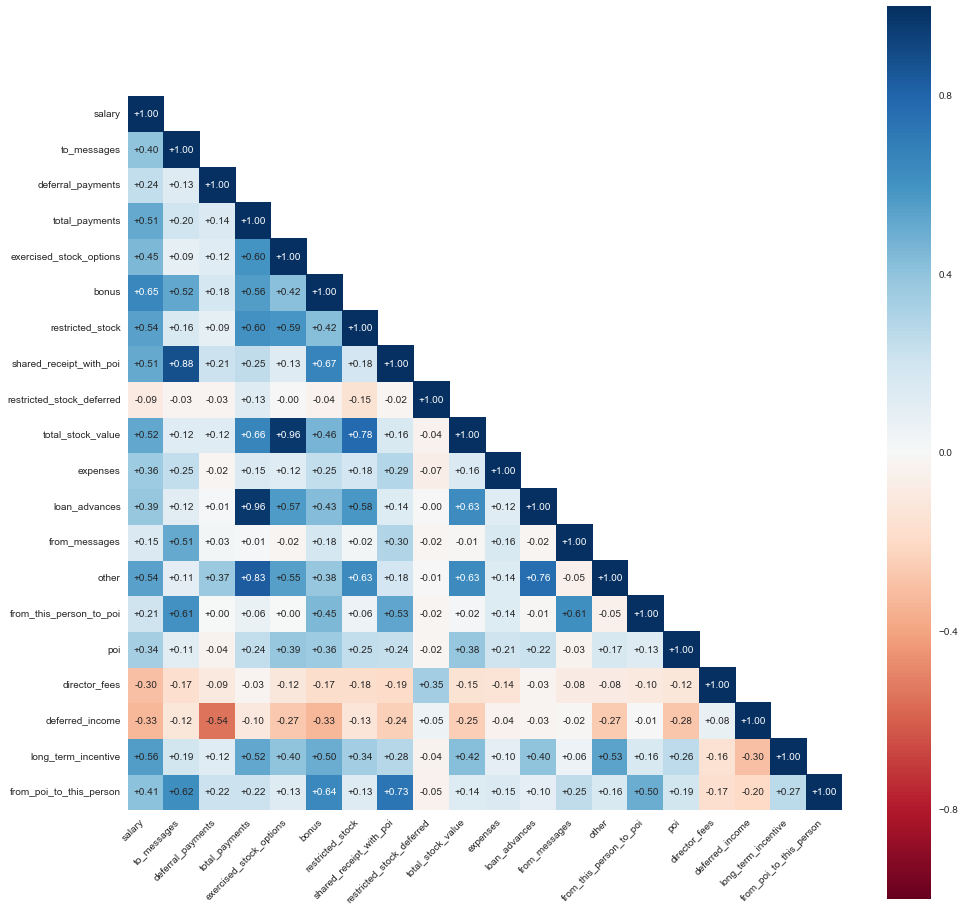

In [7]:
corr = df_without_email.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
plt.figure(figsize=(16,16))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');

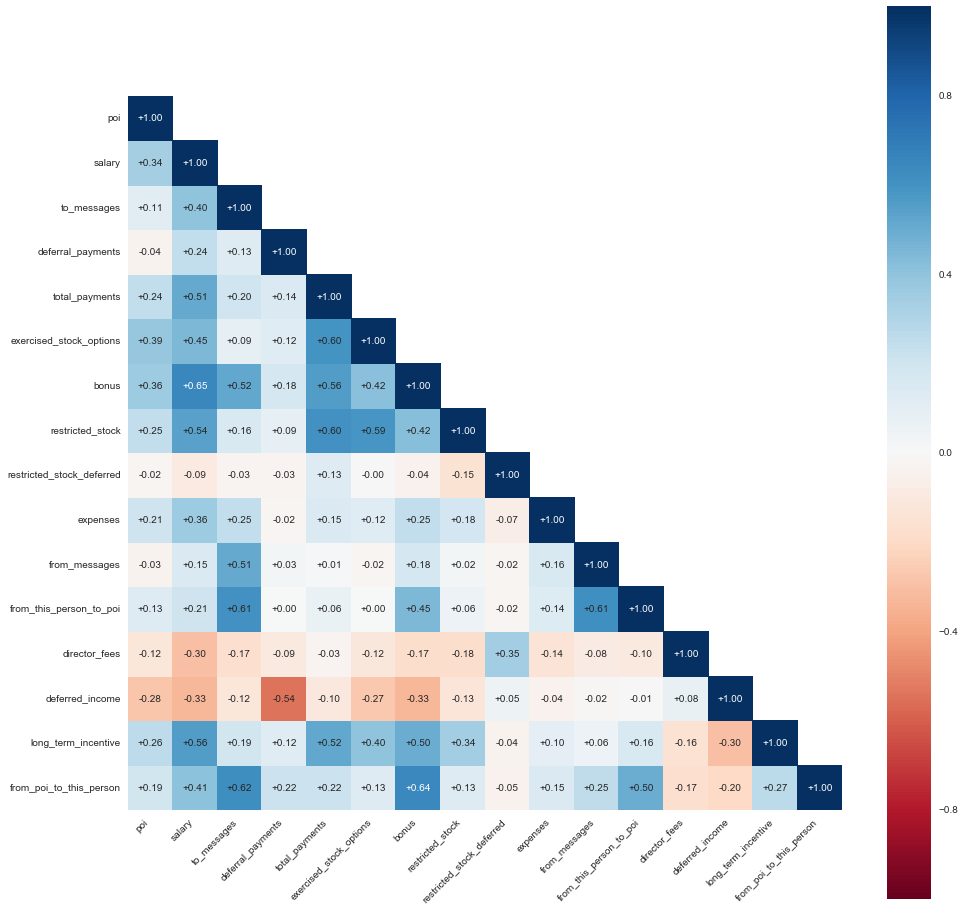

In [8]:
features_list = [
    'poi',
    'salary',
    'to_messages',
    'deferral_payments',
    'total_payments',
    'exercised_stock_options',
    'bonus',
    'restricted_stock',
    'restricted_stock_deferred',
    'expenses',
    'from_messages',
    'from_this_person_to_poi',
    'director_fees',
    'deferred_income',
    'long_term_incentive',
    'from_poi_to_this_person']

df_with_features = df_without_email[features_list]

corr = df_with_features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
plt.figure(figsize=(16,16))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');

In [9]:
# For each feature find the data points with extreme high or low values
ouliers_by_feature = {}
print df_with_features.shape
df_with_outliers = df_with_features.copy()#.drop('restricted_stock_deferred', 1)
for feature in df_with_outliers.keys():
    df_exclude_zeroes = df_with_outliers.copy()[df_with_outliers[feature] != 0]
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df_exclude_zeroes[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df_exclude_zeroes[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print Q1 - step
    print Q3 + step
    ouliers_by_feature[feature] = df_exclude_zeroes[~((df_exclude_zeroes[feature] >= Q1 - step) & (df_exclude_zeroes[feature] <= Q3 + step))]
    display(ouliers_by_feature[feature])
    
# OPTIONAL: Select the indices for data points you wish to remove
# A reasonable approach would be to consider a row an outlier if it contains outlier values for at least 2 features:
from collections import Counter
all_indices = [df_with_outliers.index.tolist() for feature, df_with_outliers in ouliers_by_feature.iteritems()]
flattened_indices = [index for index_list in all_indices for index in index_list]
outliers  = [index for index, count in Counter(flattened_indices).iteritems() if count > len(features_list) / 4]
print "Indices for rows that include outliers for multiple features: '{}'".format(outliers)

# Remove the outliers, if any were specified
display(df.iloc[outliers].T)
# display(df_with_features[df_with_features.index[outliers]].T)
good_data = df_with_features.copy().drop(df_with_features.index[outliers])

(145, 16)
Data points considered outliers for the feature 'poi':
1.0
1.0


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person


Data points considered outliers for the feature 'salary':
66595.25
453813.25


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
19,False,63744,0,0,762135,0,0,384930,0,51870,0,0,0,-10800,256191,0
49,False,477,566,0,916197,4046157,0,1757552,-560222,56301,29,0,0,-5104,0,39
57,False,510364,6019,0,4677574,3282960,3000000,2796177,0,57838,556,24,0,0,808346,186
65,True,1072321,4273,202911,103559793,34348384,7000000,14761694,0,99832,36,16,0,-300000,3600000,123
95,True,1111258,3627,0,8682716,19250000,5600000,6843672,0,29336,108,30,0,0,1920000,88
99,False,6615,0,93585,1146658,0,0,0,0,0,0,0,0,0,365625,0
100,False,655037,898,0,1386690,28798,300000,0,0,31653,67,0,0,0,0,7
127,False,492375,2181,0,550981,8831913,800000,1787380,-1787380,51124,909,20,0,-1284000,484000,64
128,False,1060932,3275,6426990,17252530,10433518,2000000,4188667,0,86987,21,6,0,-3367011,1617011,242


Data points considered outliers for the feature 'to_messages':
-2599.0
5775.0


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
22,False,271442,8305,0,3471141,81042,3100000,466101,0,5774,1728,194,0,0,0,251
32,False,231330,7315,0,969068,0,700000,126027,0,37172,4343,386,0,0,0,144
43,False,339288,7259,0,10425757,4158995,8000000,1008149,0,49537,2585,411,0,0,2035380,528
51,False,269076,15149,0,1057548,607837,650000,379164,0,137767,1215,65,0,0,0,74
57,False,510364,6019,0,4677574,3282960,3000000,2796177,0,57838,556,24,0,0,808346,186
82,True,213999,7991,2144013,5501630,953136,5249999,157569,0,17355,484,108,0,-2334434,0,228
103,False,404338,12754,0,1747522,2022048,1000000,4131594,0,41953,6759,387,0,0,300000,140


Data points considered outliers for the feature 'deferral_payments':
-1101705.625
2048561.375


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
8,False,0,2350,3131860,3131860,5210569,0,2046079,0,0,1073,15,0,0,0,44
10,False,130724,128,2964506,3100224,2282768,0,0,0,4994,17,17,0,0,0,10
75,False,374125,4009,2157527,3859065,608750,1150000,524169,-329825,76169,1941,61,0,-934484,983346,180
82,True,213999,7991,2144013,5501630,953136,5249999,157569,0,17355,484,108,0,-2334434,0,228
108,False,201955,2902,2869717,4484442,1729541,4175000,126027,-126027,13868,2195,65,0,-3081055,304805,47
128,False,1060932,3275,6426990,17252530,10433518,2000000,4188667,0,86987,21,6,0,-3367011,1617011,242


Data points considered outliers for the feature 'total_payments':
-2161043.5
4632086.5


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
1,False,267102,0,1295738,5634343,6680544,1200000,3942714,0,11200,0,0,0,-1386055,1586055,0
43,False,339288,7259,0,10425757,4158995,8000000,1008149,0,49537,2585,411,0,0,2035380,528
57,False,510364,6019,0,4677574,3282960,3000000,2796177,0,57838,556,24,0,0,808346,186
60,True,365163,3093,0,4747979,2291113,3000000,1323148,0,86174,3069,609,0,0,1294981,66
65,True,1072321,4273,202911,103559793,34348384,7000000,14761694,0,99832,36,16,0,-300000,3600000,123
82,True,213999,7991,2144013,5501630,953136,5249999,157569,0,17355,484,108,0,-2334434,0,228
95,True,1111258,3627,0,8682716,19250000,5600000,6843672,0,29336,108,30,0,0,1920000,88
117,False,0,523,0,15456290,2604490,0,-2604490,15456290,0,29,1,137864,0,0,0
128,False,1060932,3275,6426990,17252530,10433518,2000000,4188667,0,86987,21,6,0,-3367011,1617011,242
138,False,349487,1522,85430,8407016,2070306,0,0,0,8211,230,0,0,0,5145434,8


Data points considered outliers for the feature 'exercised_stock_options':
-2547307.0
5596885.0


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
1,False,267102,0,1295738,5634343,6680544,1200000,3942714,0,11200,0,0,0,-1386055,1586055,0
65,True,1072321,4273,202911,103559793,34348384,7000000,14761694,0,99832,36,16,0,-300000,3600000,123
80,False,96840,1671,0,111529,7509039,0,381285,0,14689,221,49,0,0,0,204
88,True,420636,905,0,505050,19794175,1750000,2748364,0,46950,18,4,0,-3504386,1617011,42
95,True,1111258,3627,0,8682716,19250000,5600000,6843672,0,29336,108,30,0,0,1920000,88
116,False,262788,0,0,2368151,8191755,1000000,126027,0,35812,0,0,0,0,694862,0
124,True,158403,0,0,360300,8308552,0,3576206,0,53947,0,0,0,0,0,0
125,True,0,0,10259,91093,30766064,0,0,0,77978,0,0,0,0,0,0
127,False,492375,2181,0,550981,8831913,800000,1787380,-1787380,51124,909,20,0,-1284000,484000,64
128,False,1060932,3275,6426990,17252530,10433518,2000000,4188667,0,86987,21,6,0,-3367011,1617011,242


Data points considered outliers for the feature 'bonus':
-737500.0
2362500.0


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
7,False,370448,2355,0,4099771,1104054,2600000,558801,0,137108,48,26,0,0,694862,58
22,False,271442,8305,0,3471141,81042,3100000,466101,0,5774,1728,194,0,0,0,251
43,False,339288,7259,0,10425757,4158995,8000000,1008149,0,49537,2585,411,0,0,2035380,528
57,False,510364,6019,0,4677574,3282960,3000000,2796177,0,57838,556,24,0,0,808346,186
60,True,365163,3093,0,4747979,2291113,3000000,1323148,0,86174,3069,609,0,0,1294981,66
65,True,1072321,4273,202911,103559793,34348384,7000000,14761694,0,99832,36,16,0,-300000,3600000,123
82,True,213999,7991,2144013,5501630,953136,5249999,157569,0,17355,484,108,0,-2334434,0,228
95,True,1111258,3627,0,8682716,19250000,5600000,6843672,0,29336,108,30,0,0,1920000,88
108,False,201955,2902,2869717,4484442,1729541,4175000,126027,-126027,13868,2195,65,0,-3081055,304805,47
133,False,304588,1755,0,3676340,940257,2500000,1392142,0,95924,75,37,0,0,374347,42


Data points considered outliers for the feature 'restricted_stock':
-847410.5
2084497.5


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
1,False,267102,0,1295738,5634343,6680544,1200000,3942714,0,11200,0,0,0,-1386055,1586055,0
33,False,0,573,0,475,0,0,2217299,0,475,19,7,0,0,0,4
57,False,510364,6019,0,4677574,3282960,3000000,2796177,0,57838,556,24,0,0,808346,186
65,True,1072321,4273,202911,103559793,34348384,7000000,14761694,0,99832,36,16,0,-300000,3600000,123
88,True,420636,905,0,505050,19794175,1750000,2748364,0,46950,18,4,0,-3504386,1617011,42
95,True,1111258,3627,0,8682716,19250000,5600000,6843672,0,29336,108,30,0,0,1920000,88
103,False,404338,12754,0,1747522,2022048,1000000,4131594,0,41953,6759,387,0,0,300000,140
106,False,317543,0,0,1934359,1297049,450000,13847074,0,81353,0,0,0,0,0,0
117,False,0,523,0,15456290,2604490,0,-2604490,15456290,0,29,1,137864,0,0,0
124,True,158403,0,0,360300,8308552,0,3576206,0,53947,0,0,0,0,0,0


Data points considered outliers for the feature 'restricted_stock_deferred':
-715934.0
313690.0


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
117,False,0,523,0,15456290,2604490,0,-2604490,15456290,0,29,1,137864,0,0,0
127,False,492375,2181,0,550981,8831913,800000,1787380,-1787380,51124,909,20,0,-1284000,484000,64


Data points considered outliers for the feature 'expenses':
-61415.25
162302.75


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
25,False,304110,3221,0,3038702,1441898,2000000,630137,0,178979,2681,83,0,0,554422,94
28,False,0,0,0,228656,0,0,0,0,228656,0,0,36666,-36666,0,0
71,False,263413,1744,0,1318763,506765,900000,441096,0,228763,49,0,0,-125000,0,52


Data points considered outliers for the feature 'from_messages':
-161.375
329.625


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
8,False,0,2350,3131860,3131860,5210569,0,2046079,0,0,1073,15,0,0,0,44
22,False,271442,8305,0,3471141,81042,3100000,466101,0,5774,1728,194,0,0,0,251
25,False,304110,3221,0,3038702,1441898,2000000,630137,0,178979,2681,83,0,0,554422,94
32,False,231330,7315,0,969068,0,700000,126027,0,37172,4343,386,0,0,0,144
43,False,339288,7259,0,10425757,4158995,8000000,1008149,0,49537,2585,411,0,0,2035380,528
51,False,269076,15149,0,1057548,607837,650000,379164,0,137767,1215,65,0,0,0,74
57,False,510364,6019,0,4677574,3282960,3000000,2796177,0,57838,556,24,0,0,808346,186
58,False,365038,3329,0,2101364,1623010,1100000,1478269,0,81364,2742,194,0,0,554422,92
60,True,365163,3093,0,4747979,2291113,3000000,1323148,0,86174,3069,609,0,0,1294981,66
75,False,374125,4009,2157527,3859065,608750,1150000,524169,-329825,76169,1941,61,0,-934484,983346,180


Data points considered outliers for the feature 'from_this_person_to_poi':
-41.625
85.375


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
22,False,271442,8305,0,3471141,81042,3100000,466101,0,5774,1728,194,0,0,0,251
32,False,231330,7315,0,969068,0,700000,126027,0,37172,4343,386,0,0,0,144
43,False,339288,7259,0,10425757,4158995,8000000,1008149,0,49537,2585,411,0,0,2035380,528
58,False,365038,3329,0,2101364,1623010,1100000,1478269,0,81364,2742,194,0,0,554422,92
60,True,365163,3093,0,4747979,2291113,3000000,1323148,0,86174,3069,609,0,0,1294981,66
82,True,213999,7991,2144013,5501630,953136,5249999,157569,0,17355,484,108,0,-2334434,0,228
89,False,275101,4607,0,1086821,850010,400000,126027,0,83585,14368,171,0,0,323466,41
103,False,404338,12754,0,1747522,2022048,1000000,4131594,0,41953,6759,387,0,0,300000,140


Data points considered outliers for the feature 'director_fees':
39963.75
156525.75


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
24,False,0,0,-102500,102500,3285,0,0,44093,0,0,0,3285,0,0,0
28,False,0,0,0,228656,0,0,0,0,228656,0,0,36666,-36666,0,0
47,False,0,653,0,0,0,0,0,0,0,26,0,17500,-17500,0,0
64,False,0,0,0,2151,0,0,0,0,2151,0,0,38346,-38346,0,0


Data points considered outliers for the feature 'deferred_income':
-1471134.125
821998.875


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
4,True,243293,1045,0,288682,5538001,1500000,853064,0,34039,32,21,0,-3117011,1617011,32
82,True,213999,7991,2144013,5501630,953136,5249999,157569,0,17355,484,108,0,-2334434,0,228
88,True,420636,905,0,505050,19794175,1750000,2748364,0,46950,18,4,0,-3504386,1617011,42
108,False,201955,2902,2869717,4484442,1729541,4175000,126027,-126027,13868,2195,65,0,-3081055,304805,47
128,False,1060932,3275,6426990,17252530,10433518,2000000,4188667,0,86987,21,6,0,-3367011,1617011,242


Data points considered outliers for the feature 'long_term_incentive':
-560213.5
1667022.5


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
17,False,251654,136,842924,3202070,1056320,1100000,360528,0,0,16,0,0,-719000,1725545,12
34,False,182245,0,0,2692324,601438,200000,407503,0,21530,0,0,0,0,2234774,0
43,False,339288,7259,0,10425757,4158995,8000000,1008149,0,49537,2585,411,0,0,2035380,528
65,True,1072321,4273,202911,103559793,34348384,7000000,14761694,0,99832,36,16,0,-300000,3600000,123
85,True,440698,0,0,2424083,0,1300000,1794412,0,55921,0,0,0,-1386055,1736055,0
95,True,1111258,3627,0,8682716,19250000,5600000,6843672,0,29336,108,30,0,0,1920000,88
138,False,349487,1522,85430,8407016,2070306,0,0,0,8211,230,0,0,0,5145434,8


Data points considered outliers for the feature 'from_poi_to_this_person':
-89.0
203.0


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
16,True,288542,1758,27610,1490344,0,1200000,698242,0,16514,40,11,0,-144062,0,240
22,False,271442,8305,0,3471141,81042,3100000,466101,0,5774,1728,194,0,0,0,251
43,False,339288,7259,0,10425757,4158995,8000000,1008149,0,49537,2585,411,0,0,2035380,528
80,False,96840,1671,0,111529,7509039,0,381285,0,14689,221,49,0,0,0,204
82,True,213999,7991,2144013,5501630,953136,5249999,157569,0,17355,484,108,0,-2334434,0,228
126,False,250100,2572,0,1410464,1550019,600000,315068,0,3475,63,14,0,0,556416,305
128,False,1060932,3275,6426990,17252530,10433518,2000000,4188667,0,86987,21,6,0,-3367011,1617011,242


Indices for rows that include outliers for multiple features: '[128, 22, 43, 57, 65, 82, 95]'


,128,22,43,57,65,82,95
salary,1060932,271442,339288,510364,1072321,213999,1111258
to_messages,3275,8305,7259,6019,4273,7991,3627
deferral_payments,6426990,0,0,0,202911,2144013,0
total_payments,17252530,3471141,10425757,4677574,103559793,5501630,8682716
exercised_stock_options,10433518,81042,4158995,3282960,34348384,953136,19250000
bonus,2000000,3100000,8000000,3000000,7000000,5249999,5600000
restricted_stock,4188667,466101,1008149,2796177,14761694,157569,6843672
shared_receipt_with_poi,2979,3669,3962,3920,2411,5521,2042
restricted_stock_deferred,0,0,0,0,0,0,0
total_stock_value,14622185,547143,5167144,6079137,49110078,1110705,26093672


In [16]:
poi_indices = df_with_features[df_with_features['poi'] == True].index.values
outliers_excluding_poi = [ i for i in outliers if i not in poi_indices ]
outliers

[128, 22, 43, 57]

In [54]:
good_data.describe().T

,count,mean,std,min,25%,50%,75%,max
poi,138,0.108696,0.312391,False,0,0,0,True
salary,138,160323,146784,0,0,198124,263257,655037
to_messages,138,997.123,1977.54,0,0,228.5,1299.5,15149
deferral_payments,138,168167,530634,-102500,0,0,0,3.13186e+06
total_payments,138,1.24444e+06,1.7964e+06,0,87430.5,875824,1.71305e+06,1.54563e+07
exercised_stock_options,138,1.64063e+06,3.67411e+06,0,0,549008,1.6244e+06,3.07661e+07
bonus,138,459374,659607,0,0,200000,750000,4.175e+06
restricted_stock,138,687299,1.56044e+06,-2.60449e+06,0,315068,651971,1.38471e+07
restricted_stock_deferred,138,76610,1.3301e+06,-1.78738e+06,0,0,0,1.54563e+07
expenses,138,34401.4,45684.5,0,0,16514,52158.8,228763


In [55]:
good_data['product_of_conversations_with_poi'] = good_data['from_poi_to_this_person'] * good_data['from_this_person_to_poi']

In [56]:
features_list.append('product_of_conversations_with_poi')
features_list

['poi',
 'salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'restricted_stock_deferred',
 'expenses',
 'from_messages',
 'from_this_person_to_poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person',
 'product_of_conversations_with_poi']

In [87]:
# Using Softmax for normalization
pois = good_data['poi']
df_to_normalise = good_data.copy().drop('poi', 1)
print df_to_normalise.shape
df_norm = (df_to_normalise - df_to_normalise.min()) / (df_to_normalise.max() - df_to_normalise.min())
df_exp = df_norm.apply(np.exp)
df_norm_sm = df_exp / df_exp.sum()
print df_norm_sm.shape
normalised_df = pd.concat([pois, df_norm_sm], axis=1)
display(normalised_df)

(138, 16)
(138, 16)


,poi,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,expenses,from_messages,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,product_of_conversations_with_poi
0,False,0.009666,0.007081,0.006764,0.007104,0.006810,0.007389,0.007163,0.007185,0.009206,0.007044,0.006960,0.006499,0.007515,0.006807,0.007345,0.006923
1,False,0.008314,0.006714,0.010097,0.009549,0.008461,0.008531,0.008785,0.007185,0.006402,0.007029,0.006949,0.006499,0.005060,0.009265,0.006484,0.006919
2,False,0.007179,0.006714,0.006764,0.006723,0.007983,0.006959,0.007706,0.007185,0.008594,0.007029,0.006949,0.006499,0.006703,0.006807,0.006484,0.006919
3,False,0.005530,0.007061,0.006764,0.006632,0.006956,0.006400,0.007077,0.007185,0.006096,0.007035,0.006949,0.006499,0.007515,0.006807,0.006701,0.006919
4,True,0.008018,0.007193,0.006764,0.006757,0.008153,0.009166,0.007280,0.007185,0.007074,0.007045,0.007193,0.006499,0.003088,0.009321,0.007202,0.007003
5,False,0.008314,0.006714,0.006764,0.006907,0.006810,0.006918,0.007001,0.007185,0.007105,0.007029,0.006949,0.006499,0.007515,0.006807,0.006484,0.006919
6,False,0.005530,0.006817,0.011977,0.007474,0.006920,0.006400,0.007110,0.007185,0.006096,0.007043,0.006949,0.006499,0.007515,0.006807,0.006484,0.006919
7,False,0.009735,0.007843,0.006764,0.008646,0.007058,0.011930,0.007151,0.007185,0.011101,0.007053,0.007252,0.006499,0.007515,0.007792,0.007843,0.007109
8,False,0.005530,0.007840,0.017812,0.008122,0.008066,0.006400,0.007828,0.007185,0.006096,0.007575,0.007122,0.006499,0.007515,0.006807,0.007491,0.007001
9,False,0.007472,0.007286,0.009592,0.007421,0.007007,0.007043,0.007087,0.007017,0.007359,0.007139,0.007519,0.006499,0.007444,0.006807,0.007920,0.007293


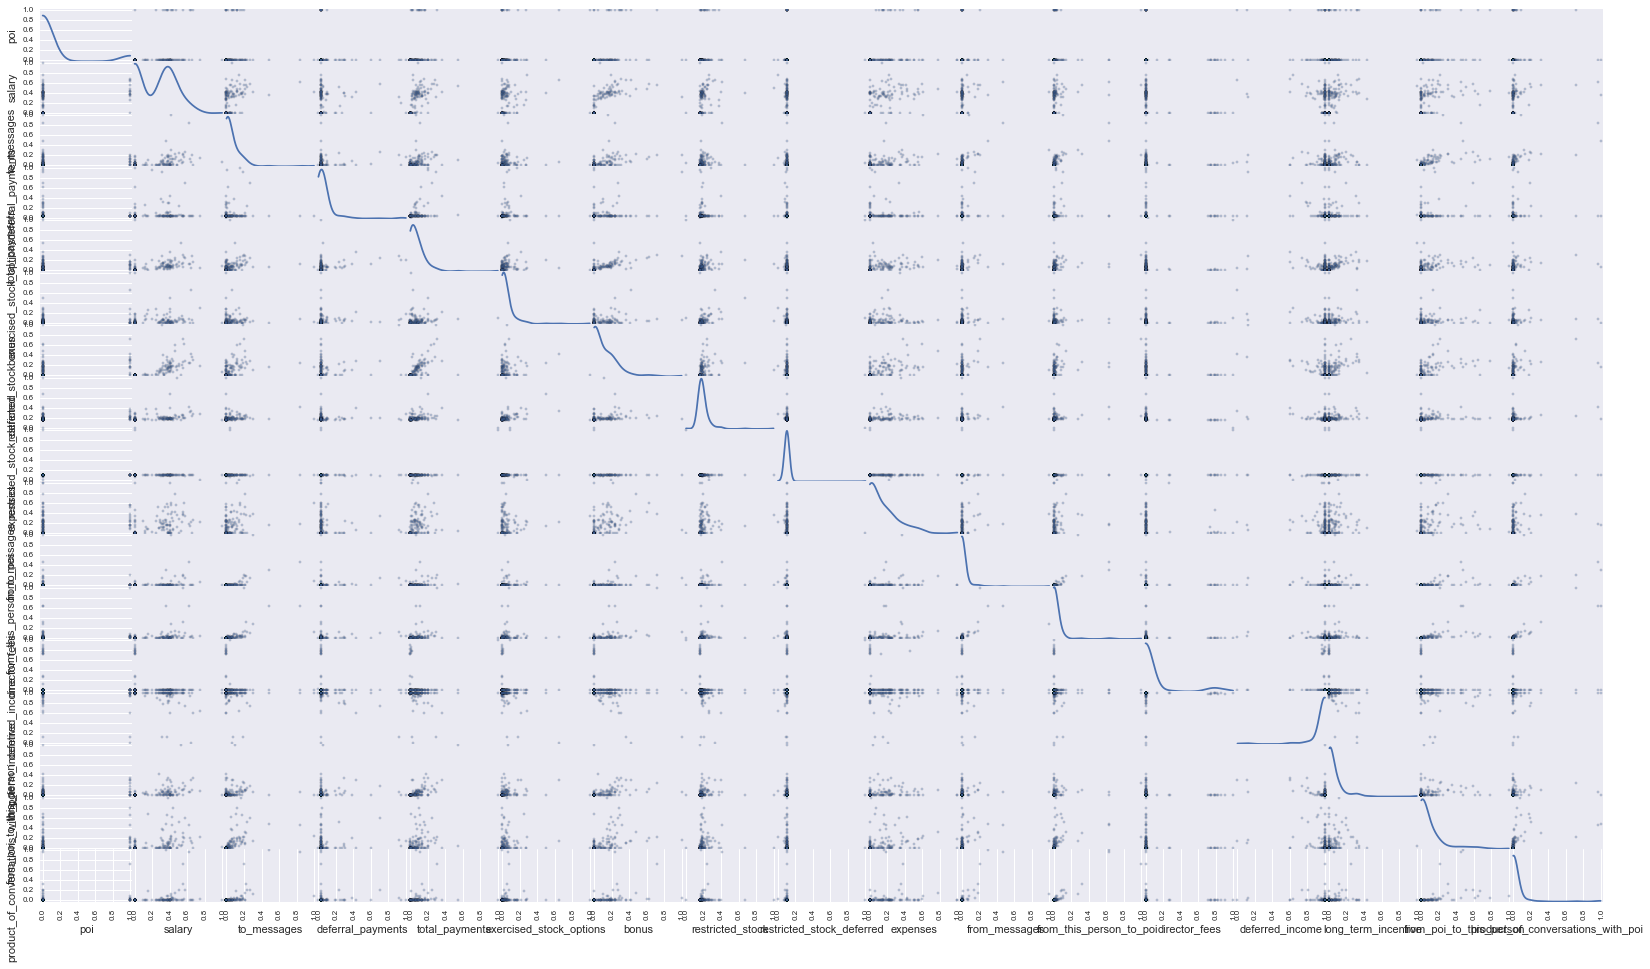

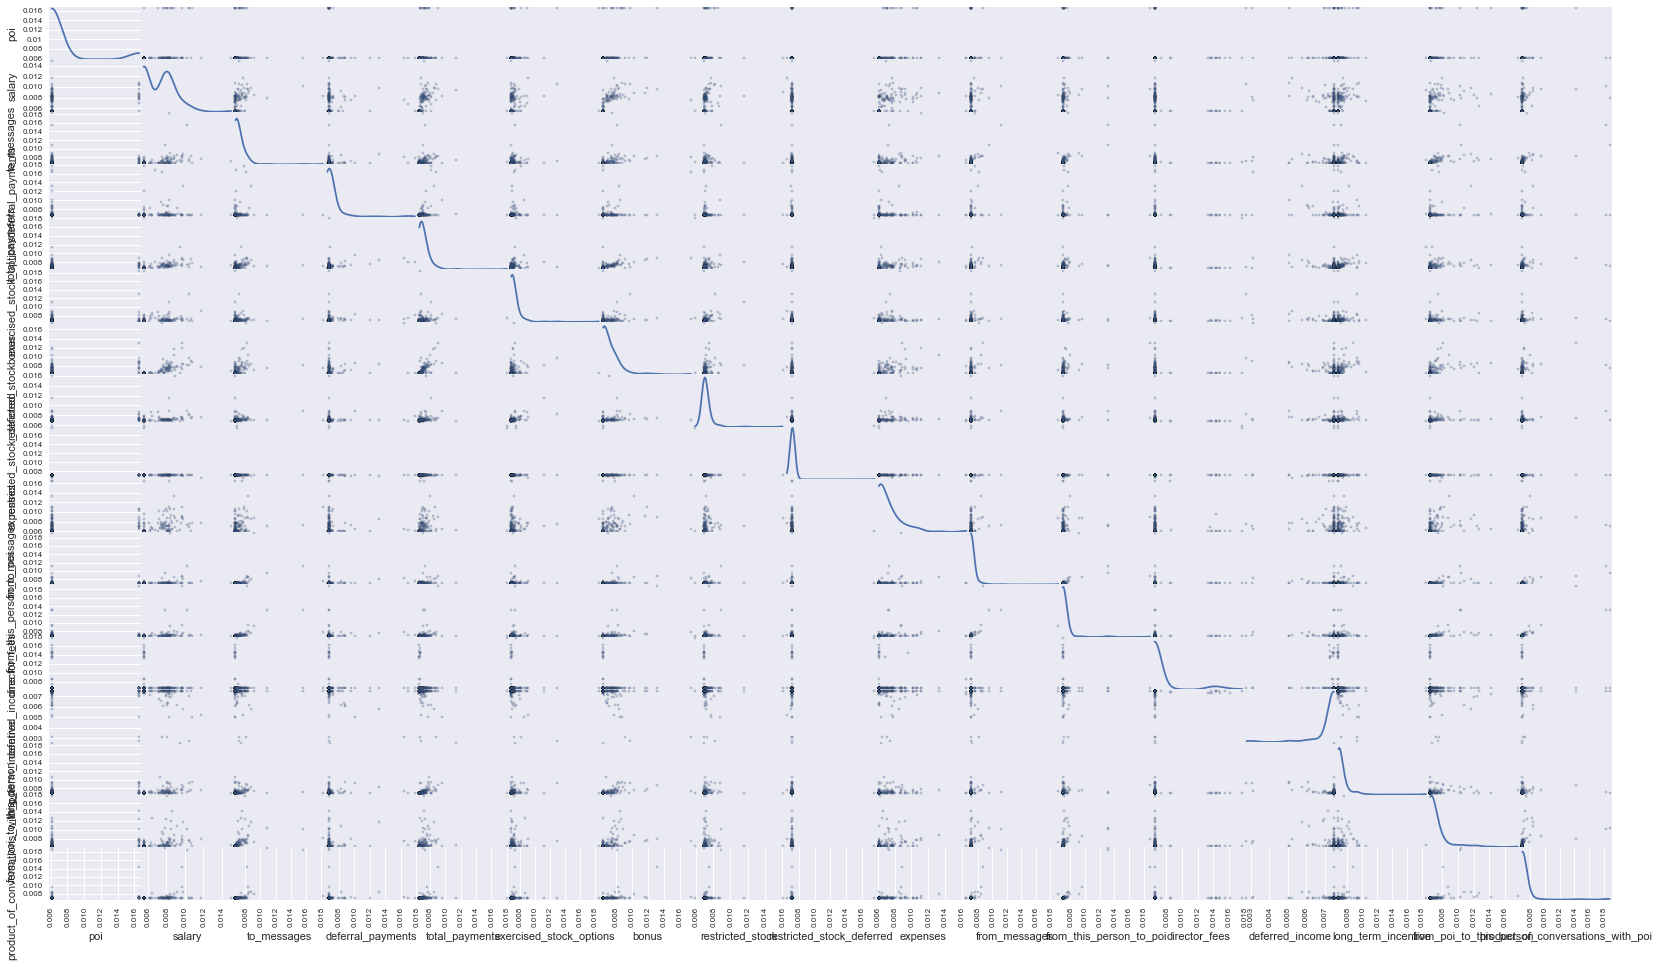

In [58]:
pd.scatter_matrix(df_norm, alpha = 0.3, figsize = (28,16), diagonal = 'kde');
pd.scatter_matrix(df_norm_sm, alpha = 0.3, figsize = (28,16), diagonal = 'kde');

In [59]:
print df_norm.mean()
print df_norm_sm.mean()

poi                                  0.108696
salary                               0.244755
to_messages                          0.065821
deferral_payments                    0.083685
total_payments                       0.080514
exercised_stock_options              0.053326
bonus                                0.110030
restricted_stock                     0.200090
restricted_stock_deferred            0.108097
expenses                             0.150380
from_messages                        0.023622
from_this_person_to_poi              0.032805
director_fees                        0.075540
deferred_income                      0.954738
long_term_incentive                  0.054278
from_poi_to_this_person              0.093490
product_of_conversations_with_poi    0.033707
dtype: float64
poi                                  0.007246
salary                               0.007246
to_messages                          0.007246
deferral_payments                    0.007246
total_payments     

In [60]:
print df_norm.std()
print df_norm_sm.std()

poi                                  0.312391
salary                               0.224086
to_messages                          0.130539
deferral_payments                    0.164062
total_payments                       0.116224
exercised_stock_options              0.119421
bonus                                0.157990
restricted_stock                     0.094851
restricted_stock_deferred            0.077135
expenses                             0.199702
from_messages                        0.101931
from_this_person_to_poi              0.119236
director_fees                        0.231441
deferred_income                      0.149434
long_term_incentive                  0.116296
from_poi_to_this_person              0.173409
product_of_conversations_with_poi    0.137853
dtype: float64
poi                                  0.003278
salary                               0.001697
to_messages                          0.001334
deferral_payments                    0.001707
total_payments     

In [88]:
normalised_df.to_dict().keys()

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'bonus',
 'restricted_stock_deferred',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'from_this_person_to_poi',
 'poi',
 'product_of_conversations_with_poi',
 'deferred_income',
 'long_term_incentive',
 'restricted_stock',
 'director_fees']

In [89]:
sys.path.append("../tools/")

In [90]:
my_dataset = normalised_df.copy()

In [70]:
data = featureFormat(my_dataset, features_list, sort_keys = True)

error: key  poi  not present


In [68]:
sorted(my_dataset.keys())

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'long_term_incentive',
 'poi',
 'product_of_conversations_with_poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'to_messages',
 'total_payments']

In [97]:
def reconstruct_dict_data(df, features_list, people):
    data_dict = {}
    for index, row in normalised_df.iterrows():
        data_dict[people[index]] = row[features_list].to_dict()
    return data_dict
reconstruct_dict_data(normalised_df, features_list, people)

{'ALLEN PHILLIP K': {'bonus': 0.017396579979341447,
  'deferral_payments': 0.016425712973604283,
  'deferred_income': 0.0031195411396272607,
  'director_fees': 0.0064992002288301225,
  'exercised_stock_options': 0.007203468723138033,
  'expenses': 0.006477137491513662,
  'from_messages': 0.00818972307542494,
  'from_this_person_to_poi': 0.00773170554226863,
  'poi': False,
  'restricted_stock': 0.006965678876211759,
  'restricted_stock_deferred': 0.007132906753249794,
  'salary': 0.0075273147422672245,
  'to_messages': 0.008131446268788728,
  'total_payments': 0.008864374275673994},
 'BADUM JAMES P': {'bonus': 0.006399844121094433,
  'deferral_payments': 0.00714866357806216,
  'deferred_income': 0.007514883991528244,
  'director_fees': 0.0064992002288301225,
  'exercised_stock_options': 0.006866995839953104,
  'expenses': 0.006189754681161566,
  'from_messages': 0.007029461061511609,
  'from_this_person_to_poi': 0.006948995588638926,
  'poi': False,
  'restricted_stock': 0.006912522243

In [96]:
for index, row in normalised_df.iterrows():
    print index
    print row[features_list].to_dict()

0
{'salary': 0.009666351712666535, 'to_messages': 0.0070812174132503436, 'deferral_payments': 0.0067638236500078466, 'total_payments': 0.0071036023335783295, 'bonus': 0.007388954195980763, 'restricted_stock_deferred': 0.007185229248801331, 'expenses': 0.009206130450598524, 'exercised_stock_options': 0.006809691437129152, 'from_messages': 0.007043663472178569, 'from_this_person_to_poi': 0.006960415463784342, 'poi': False, 'deferred_income': 0.007514883991528244, 'restricted_stock': 0.007162773616285922, 'director_fees': 0.0064992002288301225}
1
{'salary': 0.00831444048786334, 'to_messages': 0.006713866409044299, 'deferral_payments': 0.010096661898519172, 'total_payments': 0.009549008375490737, 'bonus': 0.008530933422322976, 'restricted_stock_deferred': 0.007185229248801331, 'expenses': 0.006402035216878799, 'exercised_stock_options': 0.008461164711756253, 'from_messages': 0.007029461061511609, 'from_this_person_to_poi': 0.006948995588638926, 'poi': False, 'deferred_income': 0.0050599951

In [106]:
np.array(people)[[128, 43, 65, 82, 95]]

array(['FREVERT MARK A', 'LAVORATO JOHN J', 'LAY KENNETH L',
       'BELDEN TIMOTHY N', 'SKILLING JEFFREY K'], 
      dtype='|S29')